In [165]:
#Librairies utilisées:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import plotly 
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
plotly.offline.init_notebook_mode()
import plotly.express as px
from pySankey.sankey import sankey
init_notebook_mode(connected=True)         # initiate notebook for offline plot
from plotly.subplots import make_subplots
import plotly.io as pio
#pio.renderers.default = 'svg'
pio.renderers.default = 'browser'
import plotly.offline as pyo
pyo.init_notebook_mode()
from IPython.display import Image, HTML, display, SVG
import missingno as msno
from pywaffle import Waffle

display(HTML("<style>.container { width:100% !important; }</style>"))

 1. Analyse statique globale du jeu de données


In [166]:
#Données brutes
data= pd.read_excel(r'~/8e49d734-bd63-432d-814e-6c4599f33f04.xlsx')
data


AGE   SEXE  TDT  PAR  CHOLESTEROL  GAJ     ECG  FCMAX ANGINE  \
0     40  homme   AA  140          289    0  Normal    172    Non   
1     49  femme  DNA  160          180    0  Normal    156    Non   
2     37  homme   AA  130          283    0      ST     98    Non   
3     48  femme  ASY  138          214    0  Normal    108    Oui   
4     54  homme  DNA  150          195    0  Normal    122    Non   
..   ...    ...  ...  ...          ...  ...     ...    ...    ...   
913   45  homme   AT  110          264    0  Normal    132    Non   
914   68  homme  ASY  144          193    1  Normal    141    Non   
915   57  homme  ASY  130          131    0  Normal    115    Oui   
916   57  femme   AA  130          236    0     LVH    174    Non   
917   38  homme  DNA  138          175    0  Normal    173    Non   

     DEPRESSION       PENTE  CŒUR  
0            0.0  Ascendant     0  
1            1.0       Plat     1  
2            0.0  Ascendant     0  
3            1.5       Plat     1  
4            0.0  Ascendant     0  
..           ...        ...   ...  
913          1.2       Plat     1  
914          3.4       Plat     1  
915          1.2       Plat     1  
916          0.0       Plat     1  
917          0.0  Ascendant     0  

[918 rows x 12 columns]

In [167]:
# Analyse statistique globale 

desc=data.describe(include='all')
desc


AGE   SEXE  TDT         PAR  CHOLESTEROL         GAJ     ECG  \
count   918.000000    918  918  918.000000   918.000000  918.000000     918   
unique         NaN      2    4         NaN          NaN         NaN       3   
top            NaN  homme  ASY         NaN          NaN         NaN  Normal   
freq           NaN    725  496         NaN          NaN         NaN     552   
mean     53.510893    NaN  NaN  132.396514   198.799564    0.233115     NaN   
std       9.432617    NaN  NaN   18.514154   109.384145    0.423046     NaN   
min      28.000000    NaN  NaN    0.000000     0.000000    0.000000     NaN   
25%      47.000000    NaN  NaN  120.000000   173.250000    0.000000     NaN   
50%      54.000000    NaN  NaN  130.000000   223.000000    0.000000     NaN   
75%      60.000000    NaN  NaN  140.000000   267.000000    0.000000     NaN   
max      77.000000    NaN  NaN  200.000000   603.000000    1.000000     NaN   

             FCMAX ANGINE  DEPRESSION  PENTE        CŒUR  
count   918.000000    918   918.000000   918  918.000000  
unique         NaN      2          NaN     3         NaN  
top            NaN    Non          NaN  Plat         NaN  
freq           NaN    547          NaN   460         NaN  
mean    136.809368    NaN     0.887364   NaN    0.553377  
std      25.460334    NaN     1.066570   NaN    0.497414  
min      60.000000    NaN    -2.600000   NaN    0.000000  
25%     120.000000    NaN     0.000000   NaN    0.000000  
50%     138.000000    NaN     0.600000   NaN    1.000000  
75%     156.000000    NaN     1.500000   NaN    1.000000  
max     202.000000    NaN     6.200000   NaN    1.000000

In [168]:
# Analyse des données qualitatives : les catégories

for col in data.select_dtypes('object'):
    print(f'{col :-<30}, {data[col].unique()}')

SEXE--------------------------, ['homme' 'femme']
TDT---------------------------, ['AA' 'DNA' 'ASY' 'AT']
ECG---------------------------, ['Normal' 'ST' 'LVH']
ANGINE------------------------, ['Non' 'Oui']
PENTE-------------------------, ['Ascendant' 'Plat' 'Descendant']


In [169]:
#Information sur le type des données

info=data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:>

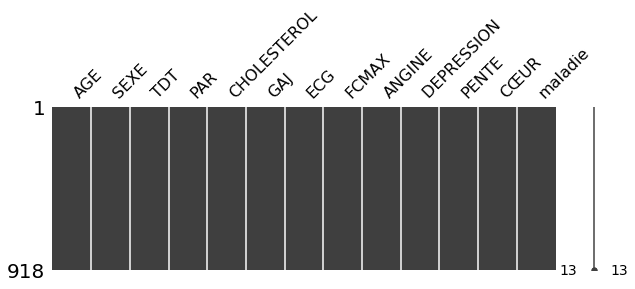

In [217]:
#Valeurs manquantes : Pas de valeur manquante
na_values=msno.matrix(data,figsize=(10,3))
na_values

/home/celia/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/celia/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/celia/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/celia/anac

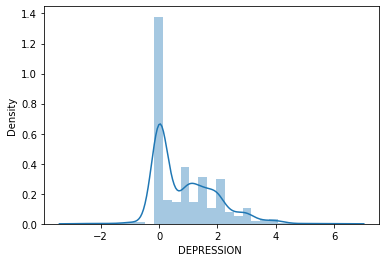

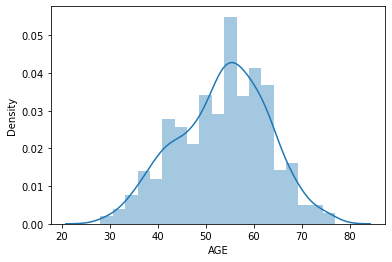

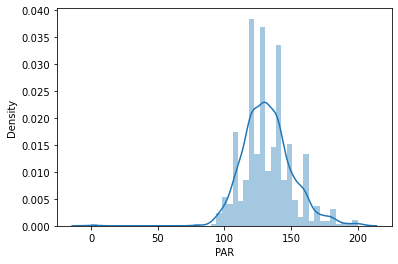

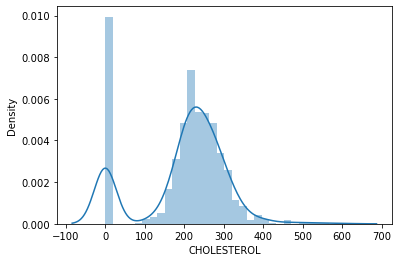

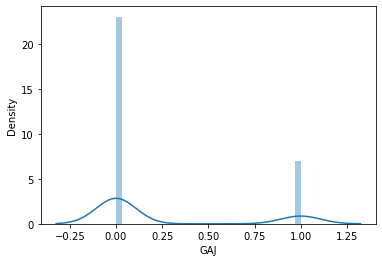

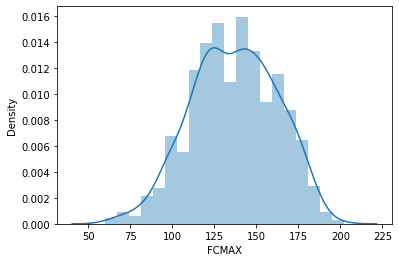

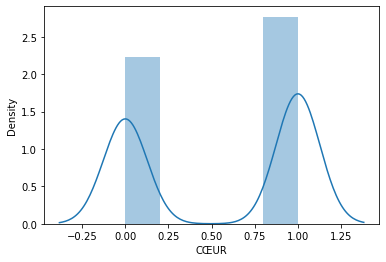

In [171]:
 # Analyse univariée de densité et distribution de chaque variable 

for col in data.select_dtypes('float64'):
    plt.figure()
    sns.distplot(data[col])
for col in data.select_dtypes('int64'):
    plt.figure()
    sns.distplot(data[col])

<AxesSubplot:>

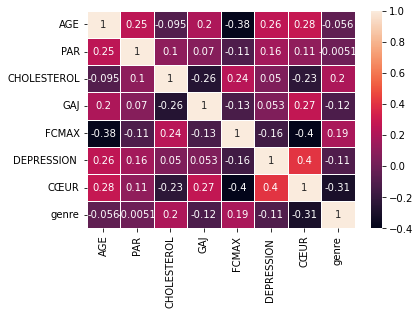

In [226]:
#Corrélation jeu de données
"""
correlation= data
correlation['genre']= correlation['SEXE'].replace(["homme","femme"],[0,1])

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(correlation, mask=mask, vmax=.3, square=True)
"""

sns.heatmap(data.corr(), annot=True, linewidths=0.5)

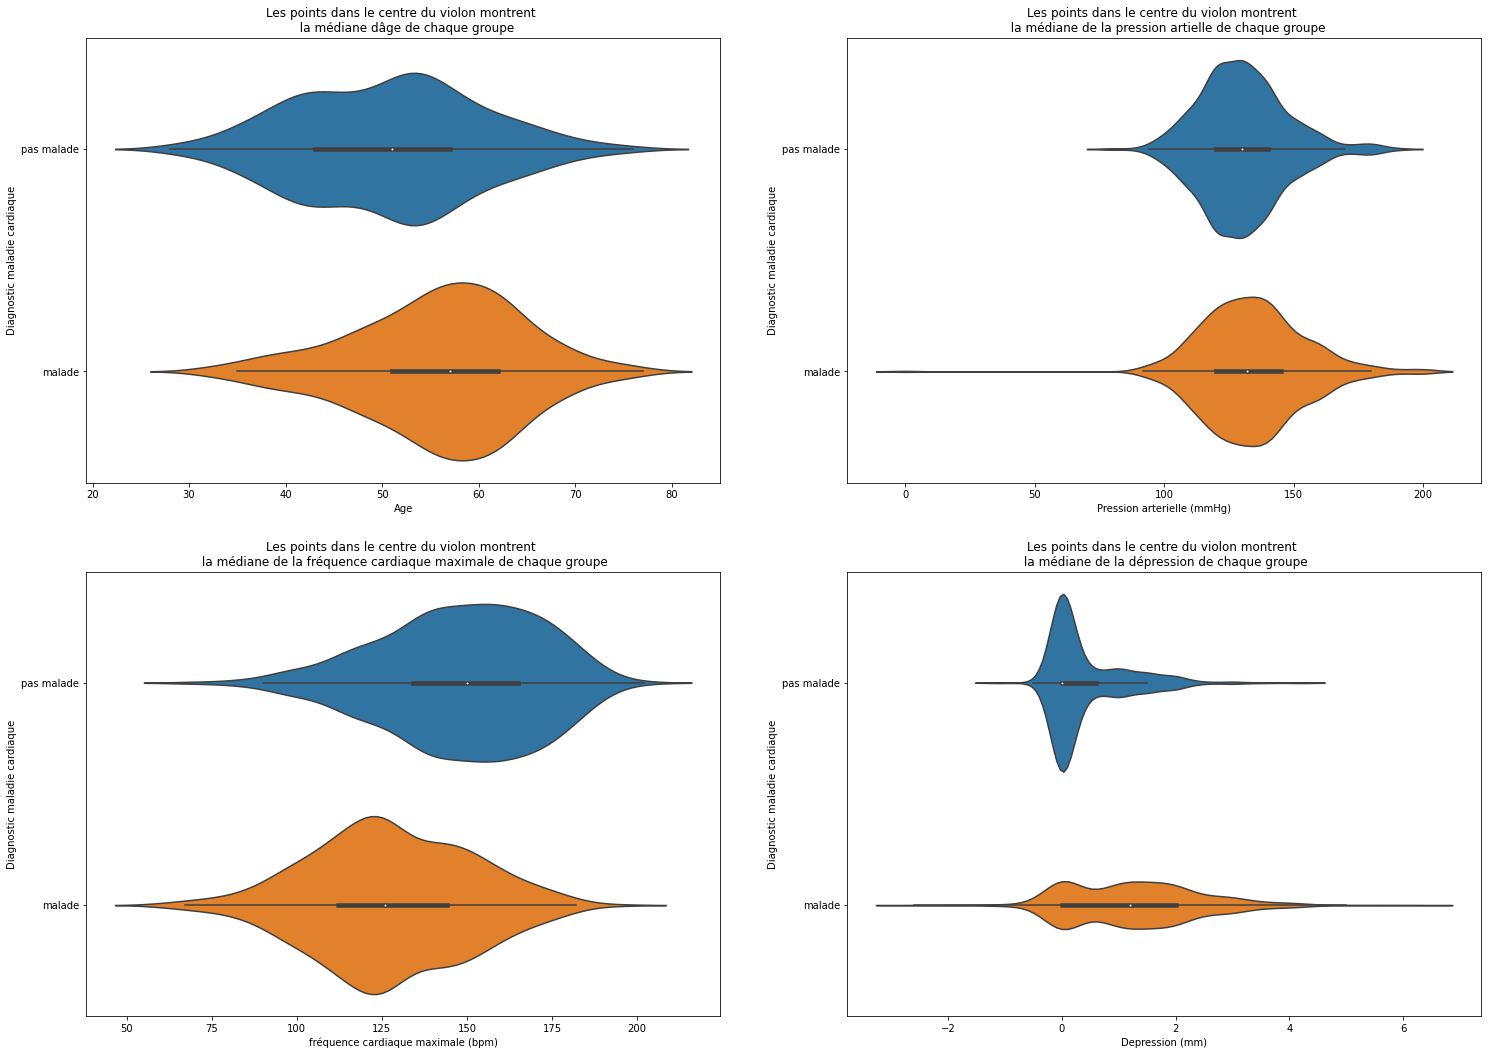

Les résultats indiquent que les variables ont une distribution différente selon le diagnostic du patient. Cela indique qu'elles ont un impact sur un patient qui souffre d'une maladie cardiaque et ce sont de bonnes variables pour notre modèle.


In [173]:
# Vérification de la relation entre les variables et le diagnostic de la maladie cardiaque
data['maladie'] =  data['CŒUR'] .replace([0,1],['pas malade','malade'])

plt.figure(figsize=(25,18))
plt.subplot(2,2,1)
sns.violinplot(y=data.maladie,x=data.AGE)
plt.title('Les points dans le centre du violon montrent \n  la médiane d''âge de chaque groupe')
plt.xlabel('Age')
plt.ylabel('Diagnostic maladie cardiaque')

plt.subplot(2,2,2)
sns.violinplot(y=data.maladie,x=data.PAR)
plt.title('Les points dans le centre du violon montrent \n  la médiane de la pression artielle de chaque groupe')
plt.xlabel('Pression arterielle (mmHg)')
plt.ylabel('Diagnostic maladie cardiaque')

plt.subplot(2,2,3)
sns.violinplot(y=data.maladie,x=data.FCMAX)
plt.title('Les points dans le centre du violon montrent \n la médiane de la fréquence cardiaque maximale de chaque groupe')
plt.xlabel('fréquence cardiaque maximale (bpm)')
plt.ylabel('Diagnostic maladie cardiaque')

plt.subplot(2,2,4)
sns.violinplot(y=data.maladie,x=data['DEPRESSION '])
plt.title('Les points dans le centre du violon montrent \n la médiane de la dépression de chaque groupe')
plt.xlabel('Depression (mm)')
plt.ylabel('Diagnostic maladie cardiaque')
relation=plt.show()

print("Les résultats indiquent que les variables ont une distribution différente selon le diagnostic du patient. Cela indique qu'elles ont un impact sur un patient qui souffre d'une maladie cardiaque et ce sont de bonnes variables pour notre modèle.")

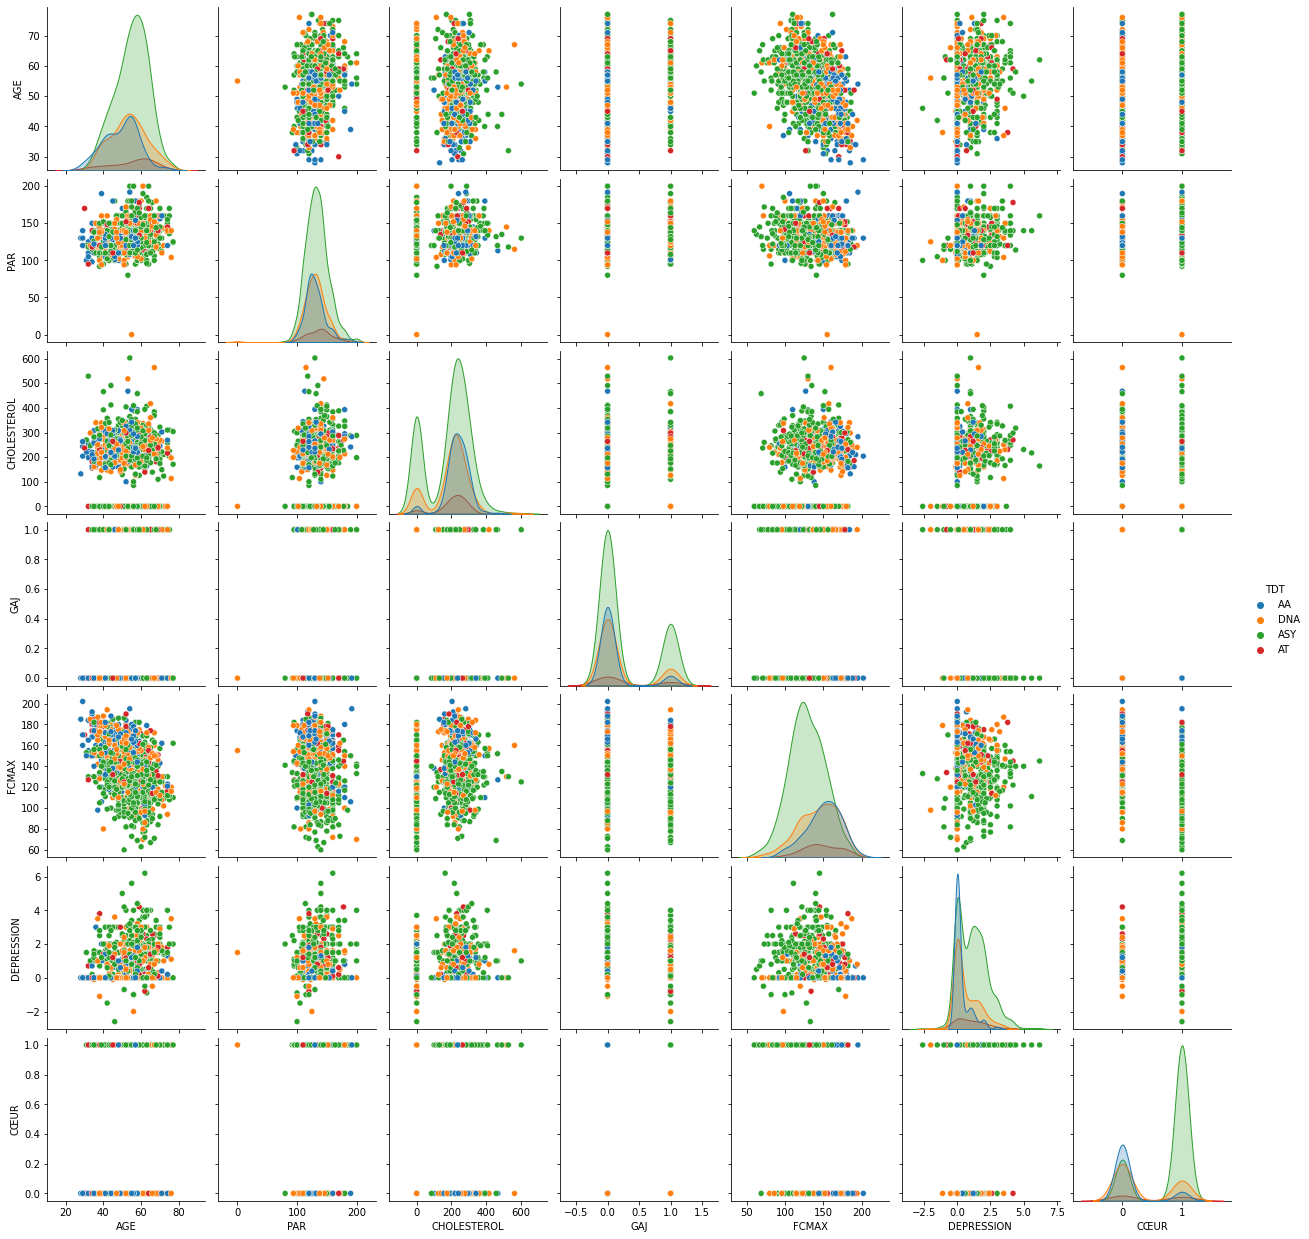

In [181]:
# Plot pair variable analysis
pair=sns.pairplot(data, hue='TDT')
pair

 2. Les individus


In [174]:
#Personnes malades 
is_sick =  data[data.CŒUR == 1]
print("Le nombre de personne malade est : ", len(is_sick))

#Personne non malade
is_notsick =  data[data.CŒUR == 0]
print("Le nombre de personne non-malade est : ",len(is_notsick))

#Pourcentage de personnes atteintes 
perc_sick=round(508/(508+410)*100,2)
print("Dans notre jeu de données,",perc_sick, "% des personnes ont une maladie cardiaque")

#POurcentage femmes
nbwomen=data[data.SEXE == "femme"]
nbwomensick=len(nbwomen[nbwomen.CŒUR == 1])
pourc_womensick = (nbwomensick / len(nbwomen))*100

#POurcentage hommes
nbmen=data[data.SEXE == "homme"]
nbmensick=len(nbmen[nbmen.CŒUR == 1])
pourc_mensick = (nbmensick / len(nbmen))*100

Le nombre de personne malade est :  508
Le nombre de personne non-malade est :  410
Dans notre jeu de données, 55.34 % des personnes ont une maladie cardiaque


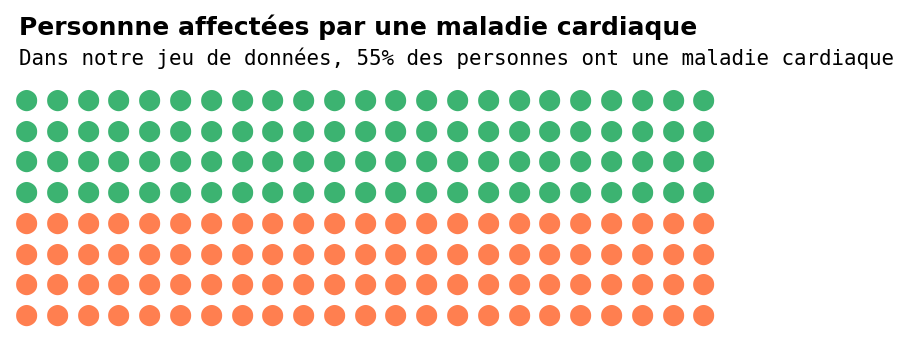

In [214]:
#Intro personnes malades
fig = plt.figure(figsize=(5, 5),dpi=150,
    FigureClass=Waffle,
    rows=8,
    values=[len(data)/10, len(data['maladie']==1)/10],
    colors=["coral", "mediumseagreen"],
    characters='⬤',
    font_size=10,vertical=True,
)

fig.text(0.035,0.72,'Personnne affectées par une maladie cardiaque ',fontfamily='sanserif',fontsize=12,fontweight='bold')
fig.text(0.035,0.68,'Dans notre jeu de données, 55% des personnes ont une maladie cardiaque',fontfamily='monospace',fontsize=10)

plt.show()

In [208]:
# Ratio FEMME/HOMME de la maladie cardiaque

coeur_sexe = data.groupby(by=["SEXE", "CŒUR"]).count()[["ANGINE"]].rename(columns={"ANGINE":"Count"}).reset_index()
coeur_sexe['CŒUR'] =  coeur_sexe['CŒUR'] .replace([0,1],['pas malade','malade'])
coeur_sexe['total'] =  len(data)


#Graphique HOMME / FEMME
fig = px.sunburst(coeur_sexe, path=['total','SEXE',"CŒUR"], values='Count',color="SEXE",labels={
                     "0": "Homme",
                     "1": "Femme"
                 }, hover_data={"SEXE": True})
fig.layout.update(title_text="Ratio Femme/Homme par rapport à la maladie")
fig.show()

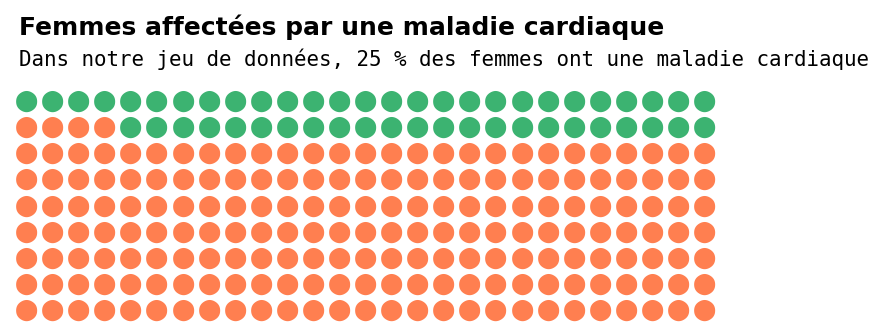

In [212]:
#Femmes malades

fig = plt.figure(figsize=(5, 5),dpi=150,
    FigureClass=Waffle,
    rows=9,
    values=[len(nbwomen), nbwomensick],
    colors=["coral", "mediumseagreen"],
    characters='⬤',
    font_size=10,vertical=True,
)

fig.text(0.035,0.72,'Femmes affectées par une maladie cardiaque ',fontfamily='sanserif',fontsize=12,fontweight='bold')
fig.text(0.035,0.68,'Dans notre jeu de données, 25 % des femmes ont une maladie cardiaque',fontfamily='monospace',fontsize=10)

plt.show()

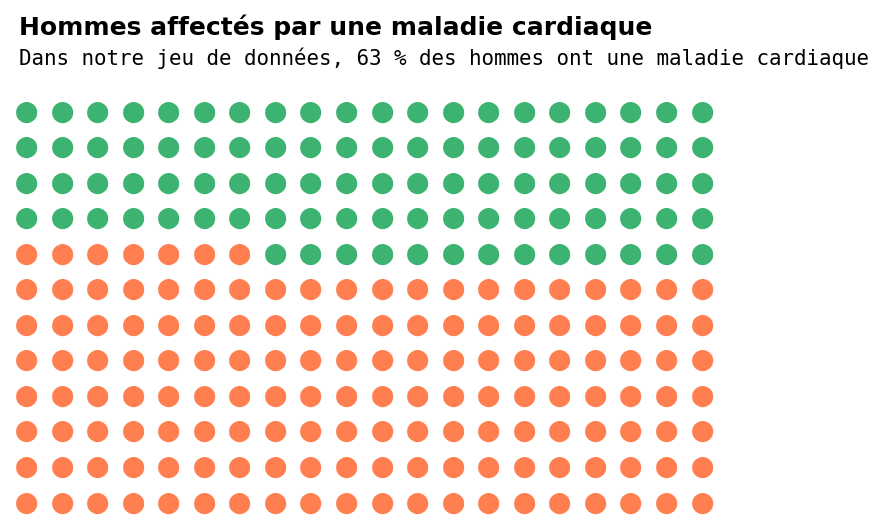

In [213]:
#Hommes malades

fig = plt.figure(figsize=(5, 5),dpi=150,
    FigureClass=Waffle,
    rows=12,
                 columns=20,
    values=[len(nbmen), nbmensick],
    colors=["coral", "mediumseagreen"],
    characters='⬤',
    font_size=10,vertical=True,
)

fig.text(0.035,0.85,'Hommes affectés par une maladie cardiaque ',fontfamily='sanserif',fontsize=12,fontweight='bold')
fig.text(0.035,0.81,'Dans notre jeu de données, 63 % des hommes ont une maladie cardiaque',fontfamily='monospace',fontsize=10)

plt.show()

In [239]:
# Données moyennes par genre des personnes non malades

notsickgenre = is_notsick.groupby(['SEXE']).mean().round(2)
notsickgenre.iloc[:, :-1]


AGE     PAR  CHOLESTEROL   GAJ   FCMAX  DEPRESSION 
SEXE                                                       
femme  51.2  128.79       247.44  0.07  149.05         0.44
homme  50.2  130.93       216.24  0.13  147.67         0.39

In [240]:
# Données moyennes par genre des personnes malades

sickgenre = is_sick.groupby(['SEXE']).mean().round(2)
sickgenre.iloc[:, :-1]

AGE     PAR  CHOLESTEROL   GAJ   FCMAX  DEPRESSION 
SEXE                                                        
femme  56.18  142.00       223.34  0.32  137.82         1.34
homme  55.87  133.33       170.77  0.34  126.55         1.27

3. Les symptômes

In [182]:
#3/ Symptôme de la maladie cardiaque: TDT 

df_cat_percent = data.groupby('maladie')['TDT'].value_counts(normalize=True).rename('pourcent').reset_index()
df_cat_percent['pourcent'] = np.round(df_cat_percent['pourcent']*100)

fig = px.bar(df_cat_percent, x='maladie',y='pourcent',color='TDT', barmode='group',
             title='<b>Maladies cardiaques et Douleurs thoraciques</b>',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()
print("[AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]")
print("La proportion de patients atteints de maladies cardiaques asymptomatiques est bien plus élevée que ceux qui souffrent de certains types de douleurs thoraciques.")


[AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]
La proportion de patients atteints de maladies cardiaques asymptomatiques est bien plus élevée que ceux qui souffrent de certains types de douleurs thoraciques.


In [200]:
#3/ Symptômes de la maladie cardiaque : Angine de poitrine

# Comparaison avec personnes non malades
isnot_sick =  data[data.CŒUR == 0]
fig_notsick = px.scatter(isnot_sick, x="AGE", y="TDT", color="SEXE")
#fig_notsick.show()

fig_nosick2 = px.scatter(isnot_sick, x="AGE", y="ANGINE", size="AGE", color="SEXE")
#fig_nosick2.show()

fig_angine = make_subplots(rows=3, cols=1, subplot_titles=("Personnes malades","Personnes non-malades"))

fig_angine.append_trace(go.Scatter(x=is_sick['AGE'],y=is_sick['ANGINE'],mode='markers',), row=1, col=1)

fig_angine.append_trace(go.Scatter( x=isnot_sick['AGE'], y=isnot_sick['ANGINE'],mode='markers',), row=2, col=1)

fig_angine.update_layout(showlegend=False,height=600, width=600, title_text="Analyse Angine")
fig_angine.show()


4. Les facteurs aggravants les risques cardiaques

In [203]:
#4/ Quelles sont les causes de la maladie ? 

# Ensemble des facteurs aggravants les risques cardiaques : Cholestérol, glycémie, la dépression, et la pression arterielle
plot_PAR = px.violin(data, x=data['CŒUR'], y=data['PAR'], color=data['SEXE'],points="all")
plot_PAR.show()
print(' Les personnes ayant une pression artérielle plus élevée font principalement partie des patients atteints de maladies cardiaques.')

 Les personnes ayant une pression artérielle plus élevée font principalement partie des patients atteints de maladies cardiaques.


In [185]:
plot_CHOL= px.violin(data, x=data['CŒUR'], y=data['CHOLESTEROL'], color=data['SEXE'],points="all")
plot_CHOL.show()
print('Les patients atteints de maladies cardiaques ont tendance à avoir un taux de cholestérol plus élevé que le groupe opposé.')

Les patients atteints de maladies cardiaques ont tendance à avoir un taux de cholestérol plus élevé que le groupe opposé.


In [186]:
plot_DEP= px.violin(data, x=data['CŒUR'], y=data['DEPRESSION '], color=data['SEXE'],points="all")
plot_DEP.show()

print('La depression peut être un symptôme et une cause aggravante de la maladie cardiaque.')

La depression peut être une cause aggravante de la maladie cardiaque.


In [205]:
#4/ Quelles sont les causes de la maladie ? 

#Répartition des hommes et des femmes en fonction de la glycémie
fig = px.histogram(data,x='GAJ',color='maladie', barmode='group',
                   title='<b>Maladie cardiaque et glycémie</b>',
                   color_discrete_sequence=px.colors.qualitative.Safe)
fig.show()

print("Les personnes avec une glycémie <120 mg, ont un nombre plus élevé de maladies non cardiaques alors que les personnes avec une glycemie élevée presentes plus de maladies cardiaques ")

Les personnes avec une glycémie <120 mg, ont un nombre plus élevé de maladies non cardiaques alors que les personnes avec une glycemie élevée presentes plus de maladies cardiaques 


5. Résultats d'un test d'effort

In [188]:
# 5/ Résultats d'un test d'effort

#Analyse Frequence cardiaque max d'une personne malade ou non, en fonction de l'âge
fig_fcmax = px.scatter_3d(data, x="AGE", 
                    y="maladie",  
                    z='FCMAX',  
                    color='SEXE',
                    size="CHOLESTEROL",title="Répartition des hommes & femmes cardiaques selon leur fréquence cardiaque maximale,  et l'âge") 
  
fig_fcmax.show()
print("Ici nous voyons la distribution homme et femme des personnes malades et non malades en fonction de la frequence cardiaque. Nous voyons que cette dernière est plus faible pour les personnes malades ")


 Le graphique montre qu'un patient malade semble avoir une plus faible frequence cardiaque qu'un patient en bonne santé


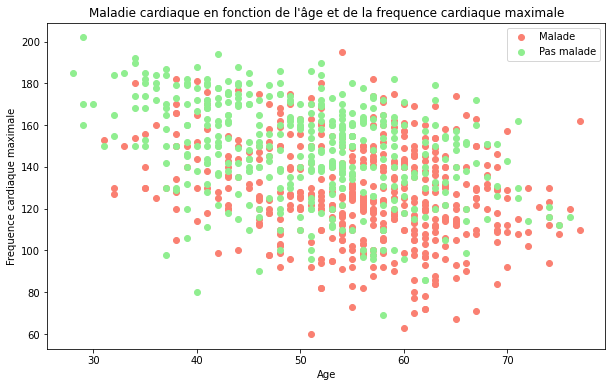

In [189]:
#Age vs. Frequence cardiaque maximale pour la maladie cardiaque

# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(data.AGE[data.CŒUR==1],
            data.FCMAX[data.CŒUR==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.AGE[data.CŒUR==0],
            data.FCMAX[data.CŒUR==0],
            c="lightgreen")

# Add some helpful info
plt.title("Maladie cardiaque en fonction de l'âge et de la frequence cardiaque maximale")
plt.xlabel("Age")
plt.ylabel("Frequence cardiaque maximale")
plt.legend(["Malade", "Pas malade"]);

print(" Le graphique montre qu'un patient malade semble avoir une plus faible frequence cardiaque qu'un patient en bonne santé")

In [199]:
fig = px.scatter(data, x='AGE',y='FCMAX', color="SEXE",trendline='ols',
                 title='<b>Maladie cardiaque en fonction de l âge et de la frequence cardiaque maximale</b>',
                 color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

print('Plus un patient a de l âge plus la frequence cardiaque décline')

Plus un patient a de l âge plus la frequence cardiaque décline


In [191]:

fig_scattertroisd = px.scatter_3d(is_sick, x='AGE', 
                    y='SEXE',  
                    z='FCMAX', 
                    size = 'CHOLESTEROL',
                    color='ANGINE',
                   title="Répartition des hommes & femmes cardiaques selon leur fréquence cardiaque maximale,l'âge et l'angine")
  
fig_scattertroisd.show()

In [192]:
#Analyse l'ECG d'une personne malade ou non

lastsick=is_sick.groupby(['SEXE','ECG']).count().reset_index()
fig_issick= px.funnel(lastsick, x='AGE', y='ECG', color='SEXE',title="Nombre de personne malade en fonction de l'ECG")
fig_issick.show()


In [193]:
lastnot=is_notsick.groupby(['SEXE','ECG']).count().reset_index()
fig_isnot= px.funnel(lastnot, x='AGE', y='ECG', color='SEXE',title="Nombre de personne non-malade en fonction de l'ECG")
fig_isnot.show()

In [194]:
df_cat_percent = data.groupby('ECG')['maladie'].value_counts(normalize=True).rename('percent').reset_index()
df_cat_percent['percent'] = np.round(df_cat_percent['percent']*100)

fig = px.bar(df_cat_percent.sort_values('maladie',ascending=False),
             x='ECG',y='percent',color='maladie', barmode='stack',
             title='<b>Maladie cardiaque : Analyse des résultats d éléctrocardiogramme ECG</b>')
fig.show()

print("Le groupe de personnes avec des résultats d'ECG normaux a un nombre plus élevé de maladies non cardiaques, tandis que les autres groupes montrent le contraire.")

Le groupe de personnes avec des résultats d'ECG normaux a un nombre plus élevé de maladies non cardiaques, tandis que les autres groupes montrent le contraire.


6. Conclusion

En conclusion, dans notre echantillon nous observons que cest entre 45 et 65 ans que les personnes sont le plus touchés par la maladie cardiaque, en particulier les hommes


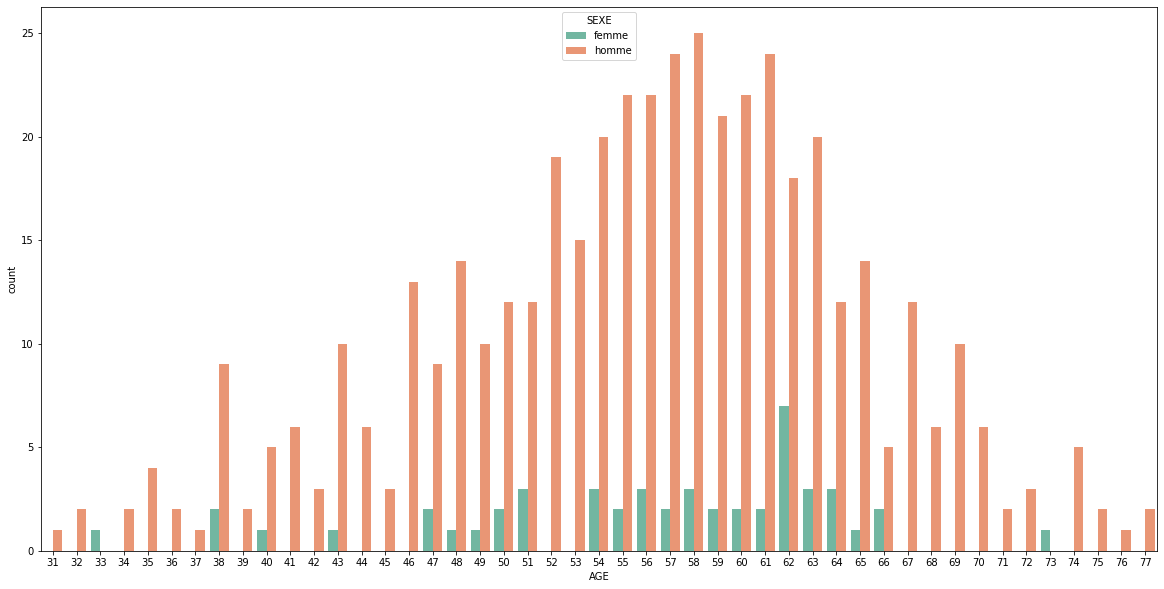

In [195]:
#Conclusion

plt.figure(figsize=(20, 10))
sns.countplot(x='AGE', hue='SEXE', data=is_sick,palette="Set2")

print('En conclusion, dans notre echantillon nous observons que c''est entre 45 et 65 ans que les personnes sont le plus touchés par la maladie cardiaque, en particulier les hommes')